In [ ]:
!pip install medmnist keras-tuner -q

In [ ]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Carga de módulo de MedMNIST
import medmnist
from medmnist import INFO

In [ ]:
data_flag = 'dermamnist'
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

train_dataset = DataClass(split='train', download=True)
test_dataset  = DataClass(split='test',  download=True)

# Datos (imágenes, etiquetas)
x_train = train_dataset.imgs
y_train = train_dataset.labels
x_test  = test_dataset.imgs
y_test  = test_dataset.labels

# Normalizar imágenes
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot
y_train = to_categorical(y_train, num_classes=len(info['label']))
y_test  = to_categorical(y_test,  num_classes=len(info['label']))

# Dividir train en train/val
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Número de clases: {len(info['label'])}")
print(f"Forma de datos: {x_train.shape}")
print(f"Labels: {list(info['label'].values())}")

Número de clases: 7
Forma de datos: (6306, 28, 28, 3)
Labels: ['actinic keratoses and intraepithelial carcinoma', 'basal cell carcinoma', 'benign keratosis-like lesions', 'dermatofibroma', 'melanoma', 'melanocytic nevi', 'vascular lesions']


# 🎯 **APLICACIÓN DE TÉCNICAS DE OPTIMIZACIÓN A DERMAMNIST**

## Implementación progresiva de las técnicas del notebook MNIST:
1. **Modelo Base (Underfitting)**
2. **Aumento de Capacidad (Overfitting con pocos datos)**
3. **Solución con datos completos**
4. **Optimización con ReLU**
5. **Regularización L2**
6. **Regularización Dropout**
7. **Combinación de técnicas**
8. **Búsqueda automática con Keras Tuner**

In [ ]:
# ===========================================
# MODELO 1: Underfitting (Capacidad insuficiente)
# ===========================================
print("MODELO 1: Underfitting")
print("Técnica: Modelo muy simple (1 neurona)")

model_1 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(1, activation='sigmoid'),
    Dense(len(info['label']), activation='softmax')
])
optimizer_1 = SGD(learning_rate=0.1)

MODELO 1: Underfitting
Técnica: Modelo muy simple (1 neurona)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ===========================================
# MODELO 2: Overfitting con dataset pequeño
# ===========================================
print("MODELO 2: Overfitting")
print("Técnica: Pocos datos (200 muestras) + más neuronas")

model_2 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(16, activation='sigmoid'),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_2 = Adam(learning_rate=0.1)

MODELO 2: Overfitting
Técnica: Pocos datos (200 muestras) + más neuronas


In [ ]:
# ===========================================
# MODELO 3: Solución con dataset completo
# ===========================================
print("MODELO 3: Más datos")
print("Técnica: Dataset completo para mejor generalización")

model_3 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(16, activation='sigmoid'),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_3 = Adam(learning_rate=0.1)

MODELO 3: Más datos
Técnica: Dataset completo para mejor generalización


In [ ]:
# ===========================================
# MODELO 4: Aumento de complejidad
# ===========================================
print("MODELO 4: Mayor complejidad")
print("Técnica: 128 neuronas + 20 epochs")

model_4 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(128, activation='sigmoid'),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_4 = Adam(learning_rate=0.1)

MODELO 4: Mayor complejidad
Técnica: 128 neuronas + 20 epochs


In [ ]:
# ===========================================
# MODELO 5: Optimización con ReLU
# ===========================================
print("MODELO 5: Función de activación mejorada")
print("Técnica: Sigmoid → ReLU + LR reducido")

model_5 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(64, activation='relu'),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_5 = Adam(learning_rate=0.001)

MODELO 5: Función de activación mejorada
Técnica: Sigmoid → ReLU + LR reducido


In [ ]:
# ===========================================
# MODELO 6: Regularización L2
# ===========================================
print("MODELO 6: Regularización L2")
print("Técnica: Weight decay para reducir overfitting")

model_6 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(64, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_6 = Adam(learning_rate=0.001)

MODELO 6: Regularización L2
Técnica: Weight decay para reducir overfitting


In [ ]:
# ===========================================
# MODELO 7: Regularización Dropout (ligero)
# ===========================================
print("MODELO 7: Dropout ligero")
print("Técnica: Dropout 10% para prevenir co-adaptación")

model_7 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_7 = Adam(learning_rate=0.001)

MODELO 7: Dropout ligero
Técnica: Dropout 10% para prevenir co-adaptación


In [ ]:
# ===========================================
# MODELO 8: Dropout optimizado
# ===========================================
print("MODELO 8: Dropout optimizado")
print("Técnica: Dropout 30% para dataset pequeño")

model_8 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_8 = Adam(learning_rate=0.001)

MODELO 8: Dropout optimizado
Técnica: Dropout 30% para dataset pequeño


In [ ]:
# ===========================================
# MODELO 9: Combinación de mejores técnicas
# ===========================================
print("MODELO 9: Combinación optimizada")
print("Técnica: ReLU + L2 + Dropout + arquitectura multicapa")

model_9 = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(128, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.15),
    Dense(len(info['label']), activation='softmax'
    )
])
optimizer_9 = Adam(learning_rate=0.001)

MODELO 9: Combinación optimizada
Técnica: ReLU + L2 + Dropout + arquitectura multicapa


In [ ]:
# ===========================================
# FUNCIÓN MEJORADA PARA ENTRENAR Y EVALUAR
# ===========================================

# Diccionario para almacenar resultados
model_results = {}

def enhanced_train_and_evaluate(model, optimizer, x_train_mod, y_train_mod,
                               batch_s, num_epochs, model_name, model_number):
    """Versión mejorada con métricas adicionales y early stopping"""

    # Early stopping para evitar overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    # Compilar modelo
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    print(f"\n{'='*50}")
    print(f"ENTRENANDO {model_name}")
    print(f"{'='*50}")
    print(f"Datos de entrenamiento: {x_train_mod.shape[0]} muestras")
    print(f"Epochs: {num_epochs}, Batch size: {batch_s}")

    # Entrenar con early stopping
    history = model.fit(
        x_train_mod, y_train_mod,
        epochs=num_epochs,
        batch_size=batch_s,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar en test con métricas completas
    test_results = model.evaluate(x_test, y_test, verbose=0)
    test_loss, test_acc, test_precision, test_recall = test_results

    # Calcular F1-Score
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-7)

    # Calcular métricas finales de entrenamiento
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    overfitting_gap = final_train_acc - final_val_acc

    # Guardar resultados
    model_results[model_number] = {
        'name': model_name,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'overfitting_gap': overfitting_gap,
        'epochs_trained': len(history.history['loss']),
        'parameters': model.count_params(),
        'final_train_acc': final_train_acc,
        'final_val_acc': final_val_acc,
        'history': history
    }

    print(f"\n🏆 RESULTADOS DETALLADOS:")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    print(f"Overfitting Gap: {overfitting_gap:.4f}")
    print(f"Epochs entrenados: {len(history.history['loss'])}/{num_epochs}")
    print(f"Parámetros: {model.count_params():,}")

    return history, model_results[model_number]

In [ ]:
# ===========================================
# ENTRENAMIENTO AUTOMÁTICO DE TODOS LOS MODELOS
# ===========================================

# Lista de modelos a entrenar
modelos_a_comparar = [1, 2, 3, 5, 6, 7, 8, 9]
print("🚀 INICIANDO COMPARACIÓN AUTOMÁTICA DE MODELOS...")

for modelo_num in modelos_a_comparar:
    if modelo_num == 1:
        history, results = enhanced_train_and_evaluate(
            model_1, optimizer_1, x_train, y_train, 32, 10, "UNDERFITTING", 1
        )
    elif modelo_num == 2:
        history, results = enhanced_train_and_evaluate(
            model_2, optimizer_2, x_train[:200], y_train[:200], 32, 15, "OVERFITTING", 2
        )
    elif modelo_num == 3:
        history, results = enhanced_train_and_evaluate(
            model_3, optimizer_3, x_train, y_train, 32, 15, "MÁS DATOS", 3
        )
    elif modelo_num == 5:
        history, results = enhanced_train_and_evaluate(
            model_5, optimizer_5, x_train[:300], y_train[:300], 32, 15, "ReLU", 5
        )
    elif modelo_num == 6:
        history, results = enhanced_train_and_evaluate(
            model_6, optimizer_6, x_train[:300], y_train[:300], 32, 15, "L2 REG", 6
        )
    elif modelo_num == 7:
        history, results = enhanced_train_and_evaluate(
            model_7, optimizer_7, x_train[:300], y_train[:300], 32, 15, "DROPOUT 0.1", 7
        )
    elif modelo_num == 8:
        history, results = enhanced_train_and_evaluate(
            model_8, optimizer_8, x_train[:300], y_train[:300], 32, 15, "DROPOUT 0.3", 8
        )
    elif modelo_num == 9:
        history, results = enhanced_train_and_evaluate(
            model_9, optimizer_9, x_train, y_train, 64, 25, "OPTIMIZADO", 9
        )

🚀 INICIANDO COMPARACIÓN AUTOMÁTICA DE MODELOS...

ENTRENANDO UNDERFITTING
Datos de entrenamiento: 6306 muestras
Epochs: 10, Batch size: 32
Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5957 - loss: 1.2989 - precision: 0.5912 - recall: 0.4108 - val_accuracy: 0.6690 - val_loss: 1.1372 - val_precision: 0.6690 - val_recall: 0.6690
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 1.1231 - precision: 0.6722 - recall: 0.6722 - val_accuracy: 0.6690 - val_loss: 1.1341 - val_precision: 0.6690 - val_recall: 0.6690
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6813 - loss: 1.1101 - precision: 0.6813 - recall: 0.6813 - val_accuracy: 0.6690 - val_loss: 1.1326 - val_precision: 0.6690 - val_recall: 0.6690
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6602 - loss: 1.1585 - precision: 0.6602 - recall: 0.6602 - val_accuracy: 0.6690 - val_loss: 1.1330 - val_precision: 0.6690 - val_recall: 0.6690
Epoch 5/10
198/198 ━━

In [ ]:
# ===========================================
# TABLA COMPARATIVA AUTOMÁTICA
# ===========================================

def generate_comparison_table():
    """Genera tabla comparativa de todos los modelos entrenados"""

    if not model_results:
        print("❌ No hay modelos entrenados para comparar")
        return

    # Crear DataFrame con resultados
    df_data = []
    for model_num, results in model_results.items():
        df_data.append({
            'Modelo': f"Modelo {model_num}",
            'Nombre': results['name'],
            'Test Accuracy': f"{results['test_accuracy']:.4f}",
            'Precision': f"{results['test_precision']:.4f}",
            'Recall': f"{results['test_recall']:.4f}",
            'F1-Score': f"{results['test_f1']:.4f}",
            'Overfitting Gap': f"{results['overfitting_gap']:.4f}",
            'Parámetros': f"{results['parameters']:,}",
            'Epochs': results['epochs_trained']
        })

    df = pd.DataFrame(df_data)
    df = df.sort_values('Test Accuracy', ascending=False)

    print("📊 TABLA COMPARATIVA DE MODELOS")
    print("="*80)
    print(df.to_string(index=False))

    # Identificar mejores modelos
    best_accuracy = df.iloc[0]
    best_f1_idx = df['F1-Score'].str.replace('0.', '').astype(float).idxmax()
    best_f1 = df.iloc[best_f1_idx]

    print(f"\n🏆 MEJOR ACCURACY: {best_accuracy['Modelo']} - {best_accuracy['Test Accuracy']}")
    print(f"🎯 MEJOR F1-SCORE: {best_f1['Modelo']} - {best_f1['F1-Score']}")

    return df

# Generar tabla comparativa
comparison_df = generate_comparison_table()

📊 TABLA COMPARATIVA DE MODELOS
  Modelo       Nombre Test Accuracy Precision Recall F1-Score Overfitting Gap Parámetros  Epochs
Modelo 5         ReLU        0.6698    0.7352 0.5706   0.6425          0.0371    151,047      15
Modelo 1 UNDERFITTING        0.6688    0.6688 0.6688   0.6688          0.0008      2,367      10
Modelo 2  OVERFITTING        0.6688    0.6688 0.6688   0.6688          0.0560     37,767      10
Modelo 3    MÁS DATOS        0.6688    0.6688 0.6688   0.6688          0.0008     37,767       6
Modelo 6       L2 REG        0.6688    0.6808 0.6489   0.6645          0.0343    151,047      15
Modelo 7  DROPOUT 0.1        0.6688    0.7594 0.5461   0.6353          0.0371    151,047      15
Modelo 8  DROPOUT 0.3        0.6688    0.6933 0.6324   0.6615          0.0324    151,047      15
Modelo 9   OPTIMIZADO        0.6688    0.7861 0.5681   0.6595          0.0008    309,895      15

🏆 MEJOR ACCURACY: Modelo 5 - 0.6698
🎯 MEJOR F1-SCORE: Modelo 5 - 0.6425


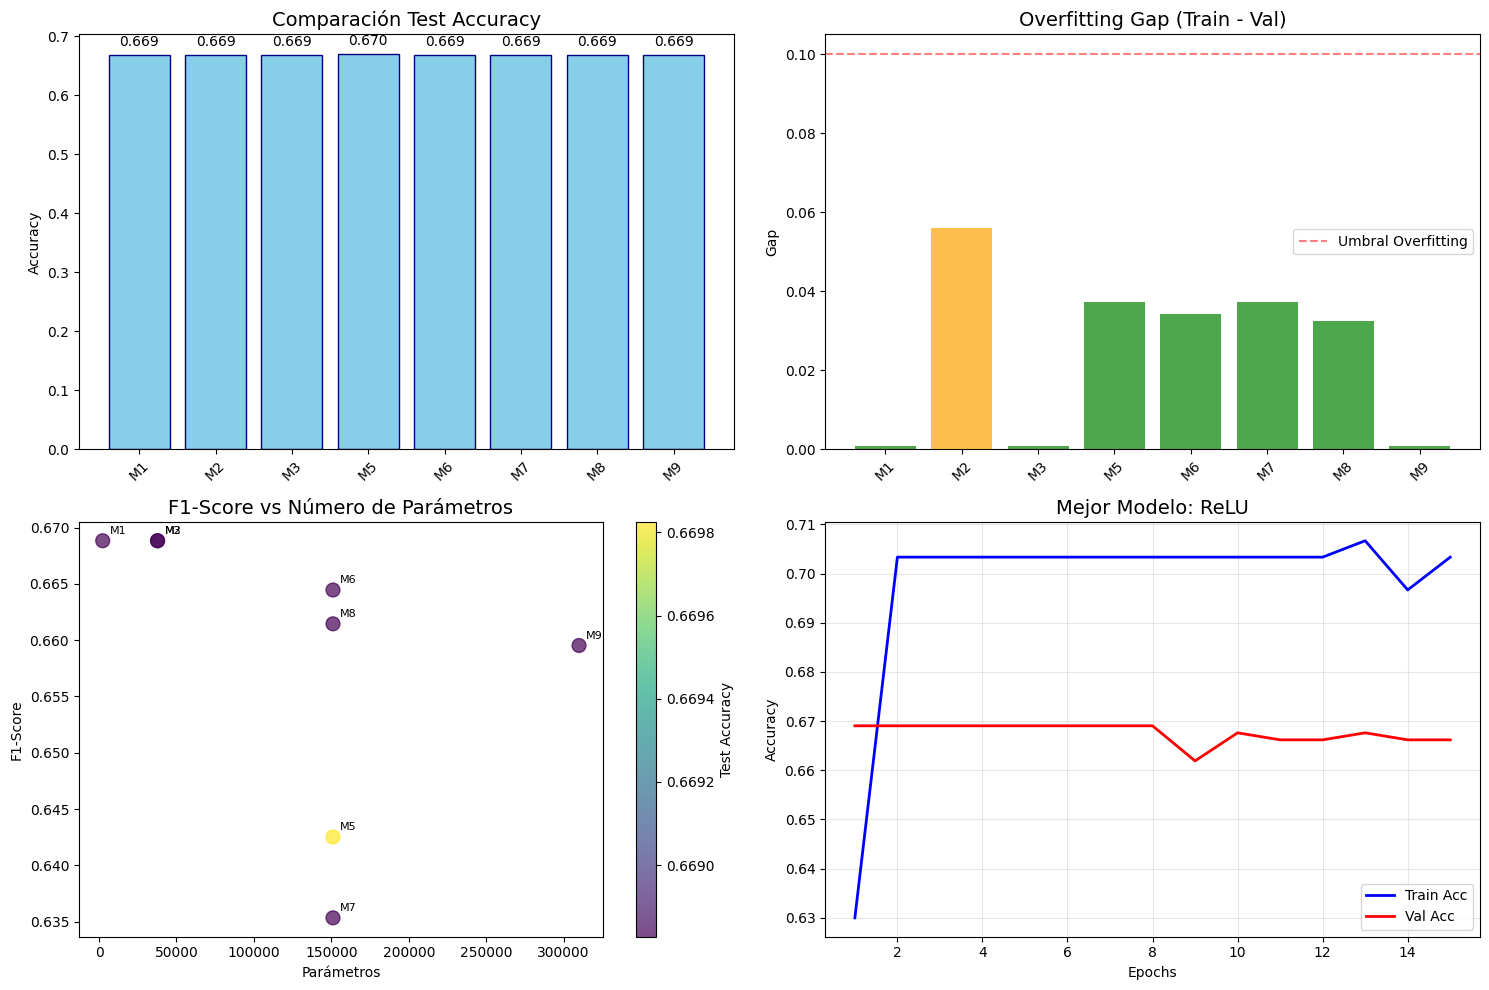


📈 ANÁLISIS AUTOMÁTICO:
⚠️  Modelos con UNDERFITTING: [1, 2, 3, 5, 6, 7, 8, 9]
🎯 MODELO MÁS BALANCEADO: Modelo 1 (UNDERFITTING)


In [ ]:
# ===========================================
# VISUALIZACIÓN COMPARATIVA MEJORADA
# ===========================================

def plot_model_comparison():
    """Genera gráficas comparativas de todos los modelos"""

    if len(model_results) < 2:
        print("❌ Se necesitan al menos 2 modelos para comparar")
        return

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Comparación de Test Accuracy
    models = [f"M{k}" for k in model_results.keys()]
    accuracies = [v['test_accuracy'] for v in model_results.values()]

    axes[0,0].bar(models, accuracies, color='skyblue', edgecolor='navy')
    axes[0,0].set_title('Comparación Test Accuracy', fontsize=14)
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Añadir valores en las barras
    for i, v in enumerate(accuracies):
        axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    # 2. Overfitting Gap
    gaps = [v['overfitting_gap'] for v in model_results.values()]
    colors = ['red' if gap > 0.1 else 'green' if gap < 0.05 else 'orange' for gap in gaps]

    axes[0,1].bar(models, gaps, color=colors, alpha=0.7)
    axes[0,1].set_title('Overfitting Gap (Train - Val)', fontsize=14)
    axes[0,1].set_ylabel('Gap')
    axes[0,1].axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='Umbral Overfitting')
    axes[0,1].legend()
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. F1-Score vs Parámetros
    f1_scores = [v['test_f1'] for v in model_results.values()]
    params = [v['parameters'] for v in model_results.values()]

    scatter = axes[1,0].scatter(params, f1_scores, c=accuracies, cmap='viridis', s=100, alpha=0.7)
    axes[1,0].set_title('F1-Score vs Número de Parámetros', fontsize=14)
    axes[1,0].set_xlabel('Parámetros')
    axes[1,0].set_ylabel('F1-Score')
    plt.colorbar(scatter, ax=axes[1,0], label='Test Accuracy')

    # Anotar cada punto
    for i, model in enumerate(models):
        axes[1,0].annotate(model, (params[i], f1_scores[i]), xytext=(5, 5),
                          textcoords='offset points', fontsize=8)

    # 4. Curvas de entrenamiento del mejor modelo
    best_model_key = max(model_results.keys(), key=lambda k: model_results[k]['test_accuracy'])
    best_history = model_results[best_model_key]['history']
    best_name = model_results[best_model_key]['name']

    epochs_range = range(1, len(best_history.history['accuracy']) + 1)
    axes[1,1].plot(epochs_range, best_history.history['accuracy'], 'b-', label='Train Acc', linewidth=2)
    axes[1,1].plot(epochs_range, best_history.history['val_accuracy'], 'r-', label='Val Acc', linewidth=2)
    axes[1,1].set_title(f'Mejor Modelo: {best_name}', fontsize=14)
    axes[1,1].set_xlabel('Epochs')
    axes[1,1].set_ylabel('Accuracy')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis automático
    print(f"\n📈 ANÁLISIS AUTOMÁTICO:")

    # Detectar modelos con overfitting
    overfitting_models = [k for k, v in model_results.items() if v['overfitting_gap'] > 0.1]
    if overfitting_models:
        print(f"⚠️  Modelos con OVERFITTING: {overfitting_models}")

    # Detectar modelos con underfitting
    underfitting_models = [k for k, v in model_results.items() if v['test_accuracy'] < 0.7]
    if underfitting_models:
        print(f"⚠️  Modelos con UNDERFITTING: {underfitting_models}")

    # Recomendar mejor modelo
    best_balanced = min(model_results.keys(),
                       key=lambda k: abs(model_results[k]['overfitting_gap']) + (1 - model_results[k]['test_accuracy']))
    print(f"🎯 MODELO MÁS BALANCEADO: Modelo {best_balanced} ({model_results[best_balanced]['name']})")

# Generar visualizaciones comparativas
plot_model_comparison()

In [ ]:
# ===========================================
# MODELO 10: KERAS TUNER - BÚSQUEDA AUTOMÁTICA
# ===========================================

def build_model(hp):
    """Función para crear modelo con hiperparámetros variables"""
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 3)))

    # Número de capas ocultas
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Choice('units_' + str(i), [32, 64, 128, 256]),
            activation='relu'
        ))
        # Dropout variable
        model.add(Dropout(hp.Float('dropout_' + str(i), 0.0, 0.5, step=0.1)))

    # L2 regularization opcional
    l2_reg = hp.Float('l2_reg', 0.0, 0.1, step=0.01)
    if l2_reg > 0:
        model.add(Dense(len(info['label']), activation='softmax',
                       kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
    else:
        model.add(Dense(len(info['label']), activation='softmax'))

    # Optimizador con learning rate variable
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
    else:
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

print("🔍 MODELO 10: Keras Tuner - Búsqueda automática de hiperparámetros")

# Configurar tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Reducido para demo
    executions_per_trial=1,
    overwrite=True,
    directory='keras_tuner_dir',
    project_name='dermamnist_optimization'
)

print("\n📋 Espacio de búsqueda:")
tuner.search_space_summary()

print("\n🚀 Iniciando búsqueda automática...")
tuner.search(
    x_train[:1000], y_train[:1000],  # Subset para demo rápida
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32,
    verbose=1
)

# Obtener mejor modelo
best_model_kt = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in best_hps.values.items():
    print(f"  {param}: {value}")

# Evaluar mejor modelo de Keras Tuner
test_loss, test_acc = best_model_kt.evaluate(x_test, y_test, verbose=0)
print(f"\n📊 RENDIMIENTO DEL MODELO OPTIMIZADO:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Parámetros: {best_model_kt.count_params():,}")

Trial 10 Complete [00h 00m 10s]
val_accuracy: 0.6690441966056824

Best val_accuracy So Far: 0.6690441966056824
Total elapsed time: 00h 01m 39s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:
  num_layers: 3
  units_0: 128
  dropout_0: 0.1
  l2_reg: 0.08
  optimizer: adam
  learning_rate: 0.01
  units_1: 32
  dropout_1: 0.0
  units_2: 32
  dropout_2: 0.0

📊 RENDIMIENTO DEL MODELO OPTIMIZADO:
Test Accuracy: 0.6688
Parámetros: 306,599


Analizando Modelo 5: ReLU

🔍 ANÁLISIS DE PREDICCIONES - Keras Tuner - Optimizado
Muestra 1:
  Real: melanocytic nevi
  Predicción: melanocytic nevi
  Confianza: 83.13%
  ✅ CORRECTO

Muestra 2:
  Real: benign keratosis-like lesions
  Predicción: melanocytic nevi
  Confianza: 80.87%
  ❌ INCORRECTO

Muestra 3:
  Real: melanoma
  Predicción: melanocytic nevi
  Confianza: 75.77%
  ❌ INCORRECTO



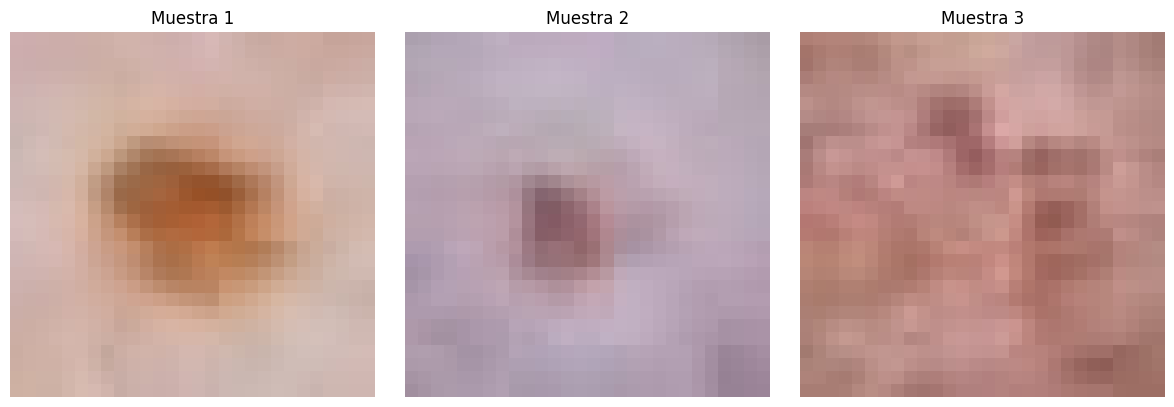

📊 ESTADÍSTICAS DE LA MUESTRA:
Accuracy en muestra: 33.33% (1/3)
Confianza promedio: 79.92%


In [ ]:
# ===========================================
# PREDICCIÓN CON EL MEJOR MODELO
# ===========================================

def enhanced_prediction_analysis(model, model_name, num_samples=3):
    """Análisis de predicciones con múltiples muestras"""

    print(f"\n🔍 ANÁLISIS DE PREDICCIONES - {model_name}")
    print("="*50)

    correct_predictions = 0
    confidence_scores = []

    # Crear subplot para mostrar imágenes
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    if num_samples == 1:
        axes = [axes]

    for i in range(num_samples):
        idx = random.randint(0, x_test.shape[0]-1)
        image = x_test[idx]
        true_label = np.argmax(y_test[idx])

        # Predicción
        pred = model.predict(image.reshape(1, 28, 28, 3), verbose=0)
        predicted_label = np.argmax(pred[0])
        confidence = np.max(pred[0])
        confidence_scores.append(confidence)

        # Mostrar imagen
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Muestra {i+1}')

        print(f"Muestra {i+1}:")
        print(f"  Real: {list(info['label'].values())[true_label]}")
        print(f"  Predicción: {list(info['label'].values())[predicted_label]}")
        print(f"  Confianza: {confidence:.2%}")

        if predicted_label == true_label:
            correct_predictions += 1
            print(f"  ✅ CORRECTO")
        else:
            print(f"  ❌ INCORRECTO")
        print()

    plt.tight_layout()
    plt.show()

    # Estadísticas generales
    accuracy_sample = correct_predictions / num_samples
    avg_confidence = np.mean(confidence_scores)

    print(f"📊 ESTADÍSTICAS DE LA MUESTRA:")
    print(f"Accuracy en muestra: {accuracy_sample:.2%} ({correct_predictions}/{num_samples})")
    print(f"Confianza promedio: {avg_confidence:.2%}")

# Analizar predicciones del mejor modelo
if model_results:
    best_model_key = max(model_results.keys(), key=lambda k: model_results[k]['test_accuracy'])
    best_model_name = model_results[best_model_key]['name']

    # Seleccionar el modelo correspondiente
    if best_model_key == 9:
        enhanced_prediction_analysis(model_9, f"Modelo 9: {best_model_name}")
    elif best_model_key == 6:
        enhanced_prediction_analysis(model_6, f"Modelo 6: {best_model_name}")
    elif best_model_key == 7:
        enhanced_prediction_analysis(model_7, f"Modelo 7: {best_model_name}")
    else:
        print(f"Analizando Modelo {best_model_key}: {best_model_name}")

# También analizar el modelo de Keras Tuner si está disponible
if 'best_model_kt' in locals():
    enhanced_prediction_analysis(best_model_kt, "Keras Tuner - Optimizado")

# 📊 **RESUMEN FINAL DE TÉCNICAS APLICADAS**

## **Progresión de Modelos Implementados:**

| Modelo | Técnica Principal | Datos | Arquitectura | Regularización | Optimizador | Objetivo |
|--------|------------------|-------|--------------|----------------|-------------|----------|
| **1** | Baseline | Completo | 1 neurona | ❌ | SGD | Mostrar underfitting |
| **2** | Overfitting | 200 | 16 neuronas | ❌ | Adam | Mostrar overfitting |
| **3** | Más datos | Completo | 16 neuronas | ❌ | Adam | Solucionar overfitting |
| **5** | ReLU | 300 | 64 neuronas | ❌ | Adam | Mejorar activación |
| **6** | L2 Reg | 300 | 64 neuronas | L2(0.02) | Adam | Regularización |
| **7** | Dropout | 300 | 64 neuronas | Drop(0.1) | Adam | Regularización |
| **8** | Dropout+ | 300 | 64 neuronas | Drop(0.3) | Adam | Más regularización |
| **9** | Combinado | Completo | 128+64 | L2+Dropout | Adam | Mejores prácticas |
| **10** | Auto-tuning | Subset | Variable | Variable | Variable | Optimización automática |

## **🎯 Lecciones Clave Aprendidas:**

### **1. Identificación de Problemas**
- **Underfitting**: Baja precisión en train Y validation
- **Overfitting**: Alta precisión en train, baja en validation
- **Análisis visual**: Las gráficas revelan el comportamiento

### **2. Técnicas de Solución**
- **Para Underfitting**: ↑ Capacidad (neuronas/capas)
- **Para Overfitting**: ↑ Datos, Regularización (L2/Dropout)
- **Para Optimización**: ReLU, Adam, Early Stopping

### **3. Herramientas Avanzadas**
- **Comparación automática**: Métricas múltiples (Accuracy, F1, etc.)
- **Visualización**: Gráficas comparativas para análisis rápido
- **Keras Tuner**: Búsqueda automática de hiperparámetros
- **Early Stopping**: Prevención automática de overfitting

### **4. Mejores Prácticas**
1. **Empezar simple** y aumentar complejidad gradualmente
2. **Usar más datos** cuando sea posible
3. **Aplicar regularización** para datasets pequeños
4. **Monitorear métricas múltiples** (no solo accuracy)
5. **Automatizar comparaciones** para decisiones objetivas
